In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data_preprocess = np.load(r'D:\NMDL\졸업논문\KMeans\dataset_(20240520_종합).npz')['dataset']
data_ID = data_preprocess[:, :, 1] # drain current
print(f'Drain Current Samples shape after PreProcessing : ', data_ID.shape)

Drain Current Samples shape after PreProcessing :  (966, 301)


In [3]:
# Drain Current 음수 값 개수 확인
count = 0
for i in range(data_ID.shape[0]) :
    for j in range(len(data_ID[i])) :
        if data_ID[i, j] <= 0 :
            count += 1
print(f'Num of Outlier(Negative Value of Drain Current) : total {data_ID.shape[0]*301}개 sample 중 ' , count)

Num of Outlier(Negative Value of Drain Current) : total 290766개 sample 중  993


In [4]:
# Drain Current Outlier 전처리

for i in range(data_ID.shape[0]) :
    for j in range(len(data_ID[i])) :
        if data_ID[i, j] <= 0 :
            if j == 300 :
                data_ID[i, j] = data_ID[i, j-1]
            elif data_ID[i, j+1] <= 0 :
                data_ID[i, j] = data_ID[i, j-1]
            else :
                data_ID[i, j] = data_ID[i, j+1]
                
# Drain Current 음수 값 개수 확인
outlier = 0
for i in range(data_ID.shape[0]) :
    for j in range(len(data_ID[i])) :
        if data_ID[i, j] <= 0 :
            outlier += 1
    
print(f'Num of Outlier after Imputation : ', outlier)             

Num of Outlier after Imputation :  0


[0 1 2 3]
[347  12 560  47]
(907, 301)


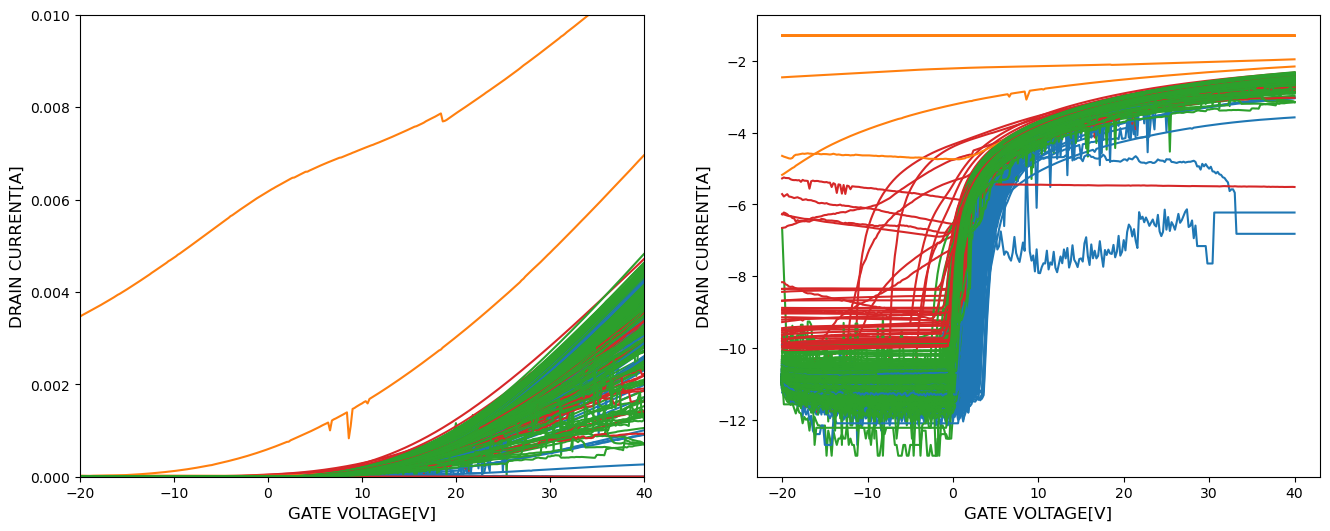

In [5]:
train_km_ID_log = np.log10(data_ID)

# train
n = 4 # num of clusters
km_log = KMeans(n_clusters=n,
                init='k-means++',)
km_log.fit(train_km_ID_log)
km_log_labels = km_log.predict(train_km_ID_log)

# label 별 counts 확인
unique, counts = np.unique(km_log_labels, return_counts = True)
print(unique) ; print(counts)


# setting the plot
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
ax[0].set_xlim([-20, 40])
ax[0].set_ylim([0, 0.010])

ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# ax[1].set_xlim([-20, 40])
# ax[1].set_ylim([1e-12, 1e-1])

plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
               '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'] # blue, orange, green, red, purple, brown, pink, ...

X = np.arange(-20, 40.2, 0.2)
for i in range(train_km_ID_log.shape[0]) :
    Y_log = train_km_ID_log[i, :]
    ax[0].plot(X, 10**(Y_log), c=plot_colors[km_log_labels[i]])
    ax[1].plot(X, Y_log, c=plot_colors[km_log_labels[i]])
    

    
####### 1차 군집 학습 결과 기반 Filtering #######
train_km_ID_log_copy = train_km_ID_log
index = []

for i in range(train_km_ID_log.shape[0]) :
    if km_log_labels[i] == np.argsort(counts)[::-1][2] or km_log_labels[i] == np.argsort(counts)[::-1][3] :
        index.append(i)

first_fil_data = np.delete(train_km_ID_log_copy, index, axis = 0)
print(first_fil_data.shape)   

[0 1 2]
[492  38 377]
(869, 301)


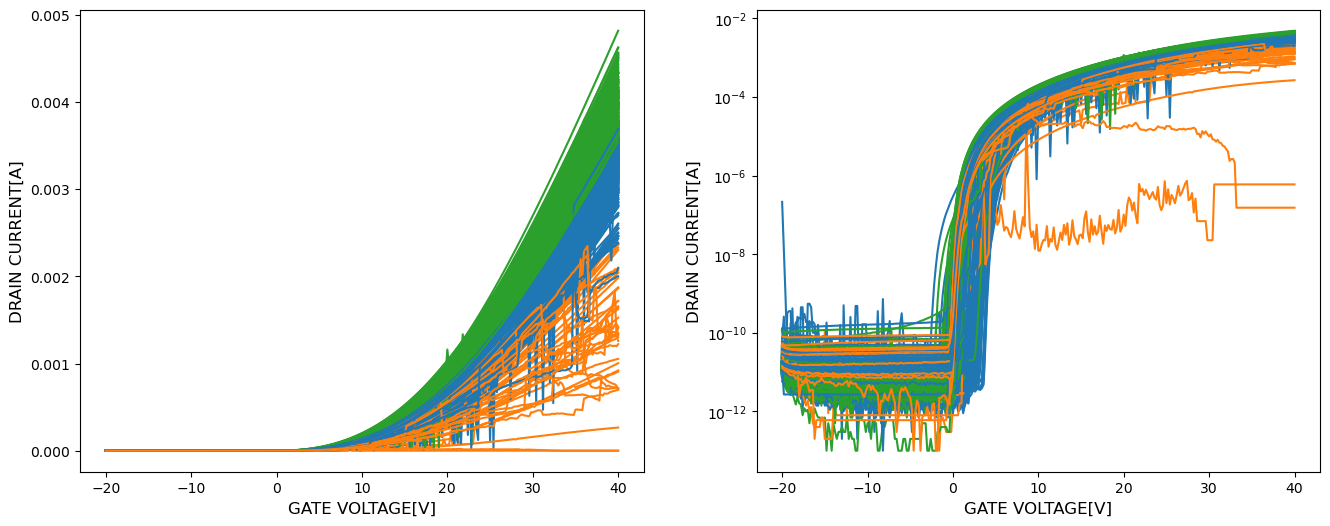

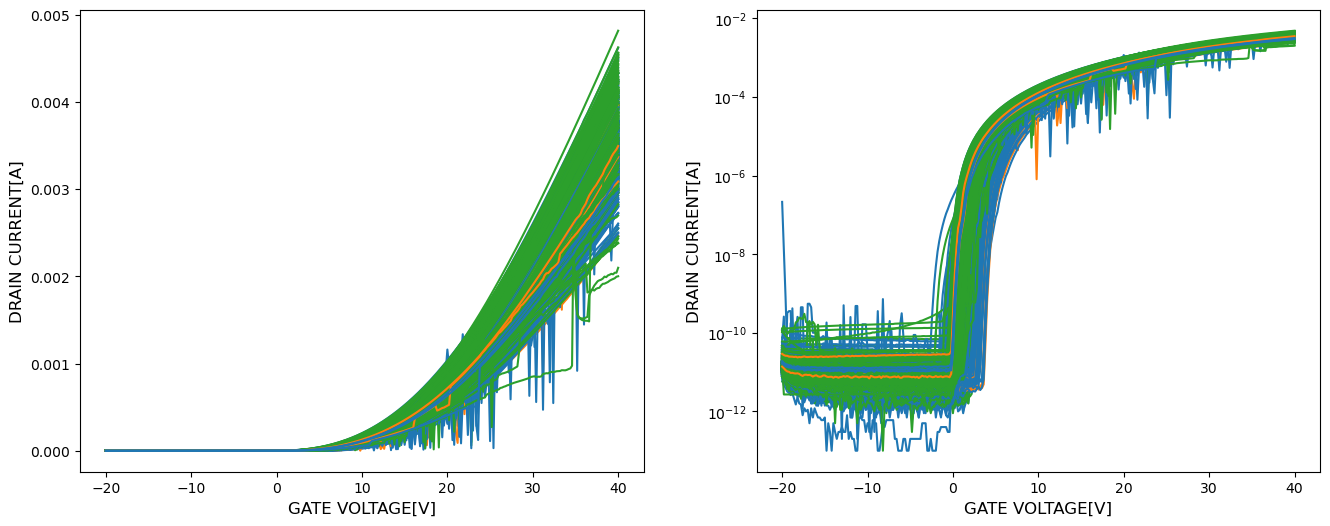

In [6]:
#
train_km_ID_linear = 10**(first_fil_data)

n = 3
km_linear = KMeans(n_clusters=n,
                   init='k-means++')
km_linear.fit(train_km_ID_linear)
km_linear_labels = km_linear.predict(train_km_ID_linear)

# label 별 counts 확인
unique2, counts2 = np.unique(km_linear_labels, return_counts = True)
print(unique2) ; print(counts2)

# 2
# setting the plot
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# ax[0].set_xlim([-20, 40])
# ax[0].set_ylim([0, 0.010])

ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# ax[1].set_xlim([-20, 40])
# ax[1].set_ylim([1e-12, 1e-1])

plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
               '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'] # blue, orange, green, red, purple, brown, pink, ...

X = np.arange(-20, 40.2, 0.2)
for i in range(train_km_ID_linear.shape[0]) :
    Y_linear = train_km_ID_linear[i, :]
    ax[0].plot(X, Y_linear, c=plot_colors[km_linear_labels[i]])
    ax[1].plot(X, Y_linear, c=plot_colors[km_linear_labels[i]])
    ax[1].set_yscale('log')
    
    
####### 2차 군집 학습 결과 기반 Filtering #######
train_km_ID_linear_copy = train_km_ID_linear
index_linear = []

for i in range(train_km_ID_linear.shape[0]) :
    if km_linear_labels[i] == np.argsort(counts2)[::-1][2] :
        index_linear.append(i)

second_fil_data = np.delete(train_km_ID_linear_copy, index_linear, axis = 0)
print(second_fil_data.shape)

###############################################################

# 2차 군집 학습 결과 기반 filter 후 plot

fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# ax[0].set_xlim([-20, 40])
# ax[0].set_ylim([0, 0.010])

ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# ax[1].set_xlim([-20, 40])
# ax[1].set_ylim([1e-12, 1e-1])

plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
               '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'] # blue, orange, green, red, purple, brown, pink, ...

X = np.arange(-20, 40.2, 0.2)
for i in range(second_fil_data.shape[0]) :
    Y_linear = second_fil_data[i, :]
    ax[0].plot(X, Y_linear, c=plot_colors[km_linear_labels[i]])
    ax[1].plot(X, Y_linear, c=plot_colors[km_linear_labels[i]])
    ax[1].set_yscale('log')

In [7]:
# extract data npz 저장
np.savez(r'D:\NMDL\졸업논문\Kmeans\extract data after train\Extract dataset_(20240520_종합)', dataset = second_fil_data)

In [206]:
# #
# train_km_ID_log2 = np.log10(second_fil_data)

# n = 3
# km_log2 = KMeans(n_clusters=n,
#                    init='k-means++')
# km_log2.fit(train_km_ID_log2)
# km_log2_labels = km_log2.predict(train_km_ID_log2)

# # label 별 counts 확인
# unique3, counts3 = np.unique(km_log2_labels, return_counts = True)
# print(unique3) ; print(counts3)

In [207]:
# # 2
# # setting the plot
# fig, ax = plt.subplots(1, 2, figsize=(16,6))
# ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
# ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# # ax[0].set_xlim([-20, 40])
# # ax[0].set_ylim([0, 0.010])

# ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
# ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# # ax[1].set_xlim([-20, 40])
# # ax[1].set_ylim([1e-12, 1e-1])

# plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
#                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'] # blue, orange, green, red, purple, brown, pink, ...

# X = np.arange(-20, 40.2, 0.2)
# for i in range(train_km_ID_log2.shape[0]) :
#     Y_log2 = train_km_ID_log2[i, :]
#     ax[0].plot(X, 10**(Y_log2), c=plot_colors[km_log2_labels[i]])
#     ax[1].plot(X, Y_log2, c=plot_colors[km_log2_labels[i]])
    


In [208]:
# train_km_ID_log2_copy = train_km_ID_log2
# index_log2 = []

# for i in range(train_km_ID_linear.shape[0]) :
#     if km_linear_labels[i] == np.argsort(counts2)[::-1][2] :
#         index_linear.append(i)

# second_fil_data = np.delete(train_km_ID_linear_copy, index_linear, axis = 0)
# print(second_fil_data.shape)

In [209]:
# #
# train_km_ID_linear2 = second_fil_data

# n = 4
# km_linear2 = KMeans(n_clusters=n,
#                    init='k-means++')
# km_linear2.fit(train_km_ID_linear2)
# km_linear2_labels = km_linear2.predict(train_km_ID_linear2)

# # label 별 counts 확인
# unique4, counts4 = np.unique(km_linear2_labels, return_counts = True)
# print(unique4) ; print(counts4)

In [210]:
# # 2
# # setting the plot
# fig, ax = plt.subplots(1, 2, figsize=(16,6))
# ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
# ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# # ax[0].set_xlim([-20, 40])
# # ax[0].set_ylim([0, 0.010])

# ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
# ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# # ax[1].set_xlim([-20, 40])
# # ax[1].set_ylim([1e-12, 1e-1])

# plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
#                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'] # blue, orange, green, red, purple, brown, pink, ...

# X = np.arange(-20, 40.2, 0.2)
# for i in range(train_km_ID_linear2.shape[0]) :
#     Y_linear2 = train_km_ID_linear2[i, :]
#     ax[0].plot(X, Y_linear2, c=plot_colors[km_linear2_labels[i]])
#     ax[1].plot(X, Y_linear2, c=plot_colors[km_linear2_labels[i]])
#     ax[1].set_yscale('log')

In [211]:
# train_km_ID_linear2_copy = train_km_ID_linear2
# index_linear2 = []

# for i in range(train_km_ID_linear2.shape[0]) :
#     if km_linear2_labels[i] == np.argsort(counts4)[::-1][3] :
#         index_linear2.append(i)

# third_fil_data = np.delete(train_km_ID_linear2_copy, index_linear2, axis = 0)
# print(third_fil_data.shape)

In [212]:
# #
# train_km_ID_log2 = np.log10(third_fil_data)

# n = 3
# km_log2 = KMeans(n_clusters=n,
#                    init='k-means++')
# km_log2.fit(train_km_ID_log2)
# km_log2_labels = km_log2.predict(train_km_ID_log2)

# # label 별 counts 확인
# unique3, counts3 = np.unique(km_log2_labels, return_counts = True)
# print(unique3) ; print(counts3)

In [213]:
# # 2
# # setting the plot
# fig, ax = plt.subplots(1, 2, figsize=(16,6))
# ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
# ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# # ax[0].set_xlim([-20, 40])
# # ax[0].set_ylim([0, 0.010])

# ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
# ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
# # ax[1].set_xlim([-20, 40])
# # ax[1].set_ylim([1e-12, 1e-1])

# plot_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
#                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'] # blue, orange, green, red, purple, brown, pink, ...

# X = np.arange(-20, 40.2, 0.2)
# for i in range(train_km_ID_log2.shape[0]) :
#     Y_log2 = train_km_ID_log2[i, :]
#     ax[0].plot(X, 10**(Y_log2), c=plot_colors[km_log2_labels[i]])
#     ax[1].plot(X, Y_log2, c=plot_colors[km_log2_labels[i]])
    


In [214]:
# # 1차 Filtering (High Grade Samples classified by Kmeans)
# import pandas as pd
# pd.set_option('display.max_rows', None) # dataframe row 생략 없이 출력

# data_num = np.arange(1, len(fil_data)+1)
# df = pd.DataFrame(data = zip(data_num, km_linear_labels), columns = (['Data_No', 'Label']))
# # df.to_csv(r'D:\NMDL\졸업논문\Kmeans\Total Grade Samples_Clustered_(20240503_종합)_NEWCODE.csv')


# # df_fil = df.loc[(df['Label'] == np.argsort(counts)[::-1][0]) | (df['Label'] == np.argsort(counts)[::-1][1])]
# # df_fil.to_csv(r'D:\NMDL\졸업논문\Kmeans\High_MiddleHigh_Grade Samples_Classified_(20240314_종합).csv') # CSV Export